# The Sparks Foundation - Data Science and Bussiness Analytics

## Create a Decision Tree Classifier and visualize it graphically.

### `Objective: To Predict CLASS of any new data accurately which is being feed to the classifier.`

##### Created and Summarized by Akanksha Saraswat

In [1]:
# model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

#train_test_split
from sklearn.model_selection import train_test_split

# Scaling Techniques
from sklearn.preprocessing import StandardScaler , MinMaxScaler

# model libraries
import statsmodels.api as sma
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# hypertuning parameters
from sklearn.model_selection import GridSearchCV,cross_val_score

#Performance Metrics
from sklearn.metrics import classification_report, roc_auc_score,cohen_kappa_score, confusion_matrix, roc_curve, accuracy_score, f1_score, log_loss

### Load the dataset 

In [2]:
df=pd.read_csv('Iris.csv' , index_col = [0])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Checking for shape, dtype and missing vaues in the data .

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
df.isnull().values.any() 

False

* Target variable is object data type , no missing value in the data .

### Using the .describe() method on the dataset and stating insights that come across.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


###  Checking for class balance. Also cheking whether flower species have equal representation in the dataset or not ?

In [6]:
df['Species'].value_counts(1)*100

Iris-virginica     33.333333
Iris-setosa        33.333333
Iris-versicolor    33.333333
Name: Species, dtype: float64

**`All categories have equal weightage, So we will use accuracy metrics to evaluate our model since data is balanced.`**

### Checking for outliers in the data. Are there any variables with high amount of outliers present or not in the dataset.


<AxesSubplot:>

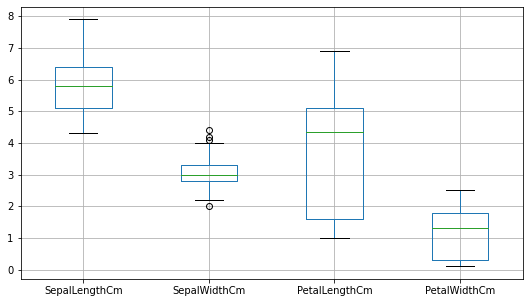

In [7]:
plt.figure(figsize=(9,5))  
df.boxplot()

* There are no outliers in the data only sepal width has few outliers, which shows some sepal has more width to better support the flower.

### Plot the distribution of all the features wrt Target Variable .

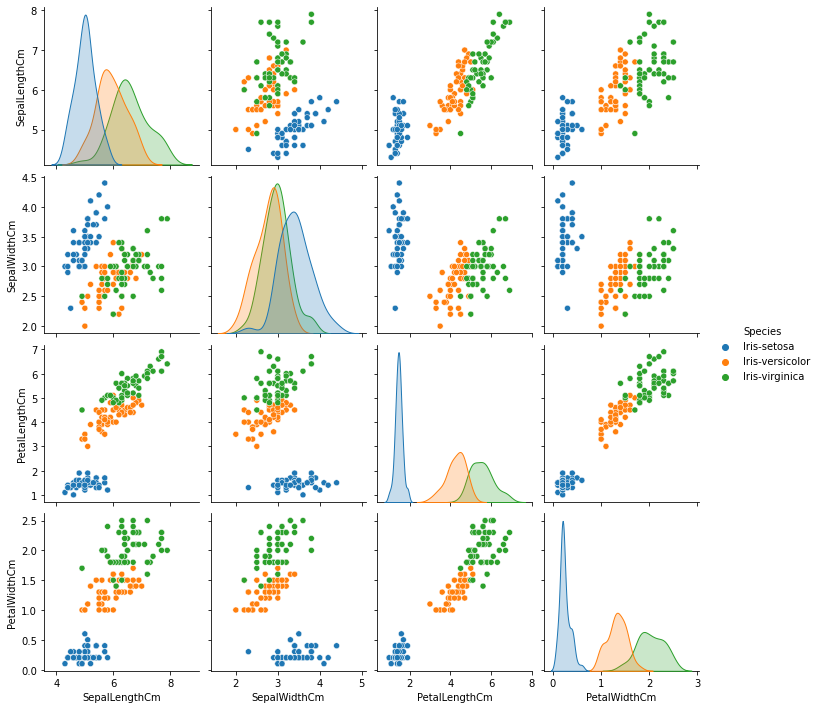

In [8]:
sns.pairplot(df,diag_kind='kde',hue='Species')

In [9]:
# Iris Setosa has different distributions then the other two . 

###  Are there any strong correlations among the independent features?

<AxesSubplot:>

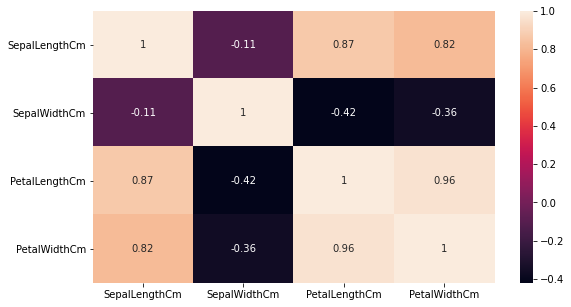

In [10]:
plt.figure(figsize=(9,5))
sns.heatmap(df.drop('Species',axis=1).corr(), annot=True )

* As can be seen from the above heatmap,  feature Petal length and Petal Width have correlation 0.96 which can be termed as highly correlated.

### Spliting dataset into a training & a test dataset  .

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df.drop('Species',axis=1)
y=df['Species']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, train_size=0.75)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

# Modelling

###  Creating a default decision tree model 

In [15]:
decisiontree = DecisionTreeClassifier()

In [16]:
decisiontree_model = decisiontree.fit(X_train, y_train)

### Train Accuracy

In [17]:
ypred_train = decisiontree_model.predict(X_train)

In [18]:
default_train_accuracy=accuracy_score(y_train, ypred_train)
print('Accuracy:', default_train_accuracy)

Accuracy: 1.0


In [19]:
mean_train_scores= np.mean(cross_val_score(estimator=decisiontree_model,X=X_train, y=y_train,cv=5,scoring='accuracy'))
mean_train_scores

0.9553359683794467

### Test Accuracy

In [20]:
ypred_test = decisiontree_model.predict(X_test)

In [21]:
default_test_accuracy=accuracy_score(y_test, ypred_test)
print('Accuracy:', default_test_accuracy)

Accuracy: 0.9736842105263158


In [22]:
mean_test_scores= np.mean(cross_val_score(estimator=decisiontree_model,X=X_test, y=y_test,cv=5,scoring='accuracy'))
mean_test_scores

0.8964285714285714

In [23]:
from sklearn.tree import plot_tree
from sklearn import tree

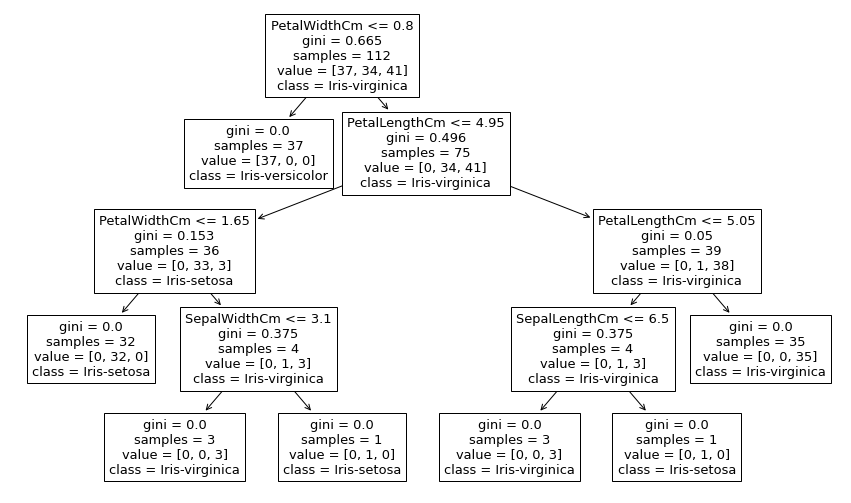

In [24]:
plt.rcParams['figure.figsize'] = [15,9]
plot_tree(decisiontree_model,feature_names=X.columns, class_names=['Iris-versicolor','Iris-setosa','Iris-virginica'])
plt.show()

### Using regularization parameters like max_depth, min_sample_leaf to recreate the model.

In [25]:
tuned_parameters = [{'criterion':['entropy','gini'],
                     'max_depth':range(2,10),
                    'min_samples_leaf':range(2,10),
                     'max_leaf_nodes':range(2,10)}]

In [26]:
tree_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=tuned_parameters, cv = 5 , scoring ='accuracy')

In [27]:
tree_grid_model = tree_grid.fit(X_train, y_train)

In [28]:
tree_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 2}

### **Rebuilding Model using best parameters**

In [39]:
dt = DecisionTreeClassifier(criterion= 'entropy', 
                                      max_depth= 4,
                                      max_leaf_nodes= 5,
                                      min_samples_leaf= 2,
                                      random_state=0
                                     )

In [40]:
dt_model = dt.fit(X_train, y_train)

### Train Accuracy using Accuracy metric

In [41]:
y_pred_train = dt_model.predict(X_train)

In [42]:
train_accuracy=accuracy_score(y_train, y_pred_train)
print('Accuracy:', train_accuracy)

Accuracy: 0.9821428571428571


In [43]:
best_param_train_scores= np.mean(cross_val_score(estimator=dt_model,X=X_train, y=y_train,cv=5,scoring='accuracy'))
best_param_train_scores

0.9644268774703558

### Test Accuracy using Accuracy metric

In [44]:
y_pred_test = dt_model.predict(X_test)

In [45]:
test_accuracy=accuracy_score(y_test, y_pred_test)
print('Accuracy:',test_accuracy )

Accuracy: 0.9736842105263158


In [46]:
best_param_test_scores= np.mean(cross_val_score(estimator=dt_model,X=X_test, y=y_test,cv=5,scoring='accuracy'))
best_param_test_scores

0.8464285714285713

## Inference: Introducing regularization in the model reduces the overfitting of the model .

In [47]:
model_predictions_df= pd.DataFrame({"Train_score":[default_train_accuracy,train_accuracy],
                                    "Test_score":[default_test_accuracy,test_accuracy]
                                    } , index=['Default_model','Best_param_model'])
model_predictions_df.head()

,Train_score,Test_score
Default_model,1.000000,0.973684
Best_param_model,0.982143,0.973684


**Plotting tree for the final model.**

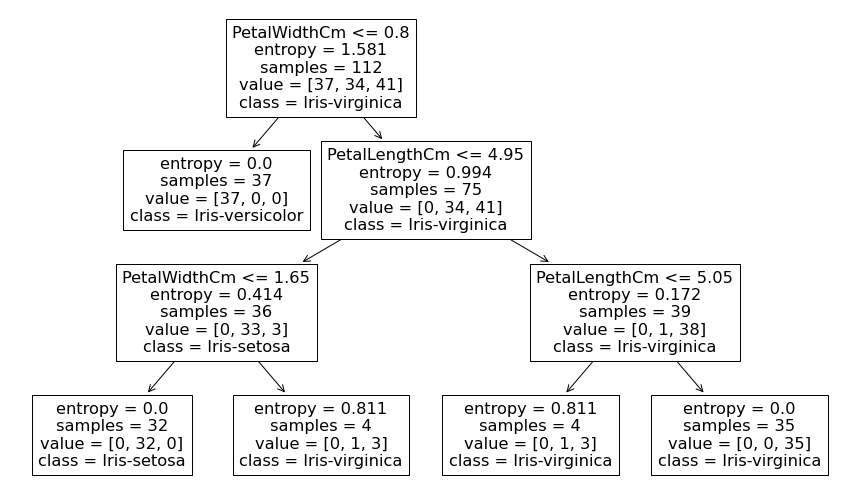

In [48]:
plt.rcParams['figure.figsize'] = [15,9]
plot_tree(dt_model,feature_names=X.columns, class_names=['Iris-versicolor','Iris-setosa','Iris-virginica'])
plt.show()

# Model Summary

* Default Decision Tree was too complex implies model imitated the training data which leads to over fiting and poor performance on validation set . 
* Measures Taken : After regularization(building model with appropriate parameters) , model is now not too complex and not too simple for prediction or unseen data .

---

### Next Steps : Use Ensemble modelling to improve your accuracy score .
### For E.g You can Refit the model using Random Forest Classifier .

---
**_Thankyou**